# Practice for Module 2

We are familiar with univariate, bivariate and multivariate analysis of data from the lab notebooks. 
We have seen how visualizations help us in analyzing the data and their limitations in analyzing multidimensional data. 

Lets continue our discussion on bivariate and multivariate data analysis by working through this practice notebook. 
You will be provided with code snippets to complete/modify the code for generating desired output. 
We will look into the bikeshare dataset on which we worked in previously.

__Remember__ to look for the `<what goes in here>` and similar prompts to complete the code. 

### Loading data

Load the data `/dsa/data/all_datasets/bikeshare/hour.csv` into R and name the datframe as `bikeshare_data`

In [1]:
bikeshare_data <- read.csv("/dsa/data/all_datasets/bikeshare/hour.csv", header = T, sep=",")
head(bikeshare_data)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


First few rows suggests most of the data is either numeric or discrete in nature except for date column. 
Again we are interetsed in identifying the independent variables which are related to variable `cnt`. 

Lets run summary() on dataset. 

In [2]:
summary(bikeshare_data)

    instant             dteday          season            yr        
 Min.   :    1   2011-01-01:   24   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   2011-01-08:   24   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   2011-01-09:   24   Median :3.000   Median :1.0000  
 Mean   : 8690   2011-01-10:   24   Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034   2011-01-13:   24   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379   2011-01-15:   24   Max.   :4.000   Max.   :1.0000  
                 (Other)   :17235                                   
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.  

** Activity 1: ** Add code to print the structure of the dataset.

In [3]:
# Your code for activity 1 below this comment
# -----------------------------------

str(bikeshare_data)





'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


We know the dimension of the dataset and datatypes of all features. Lets plot some scatter plots for cnt variable against rest of the independent variables.

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


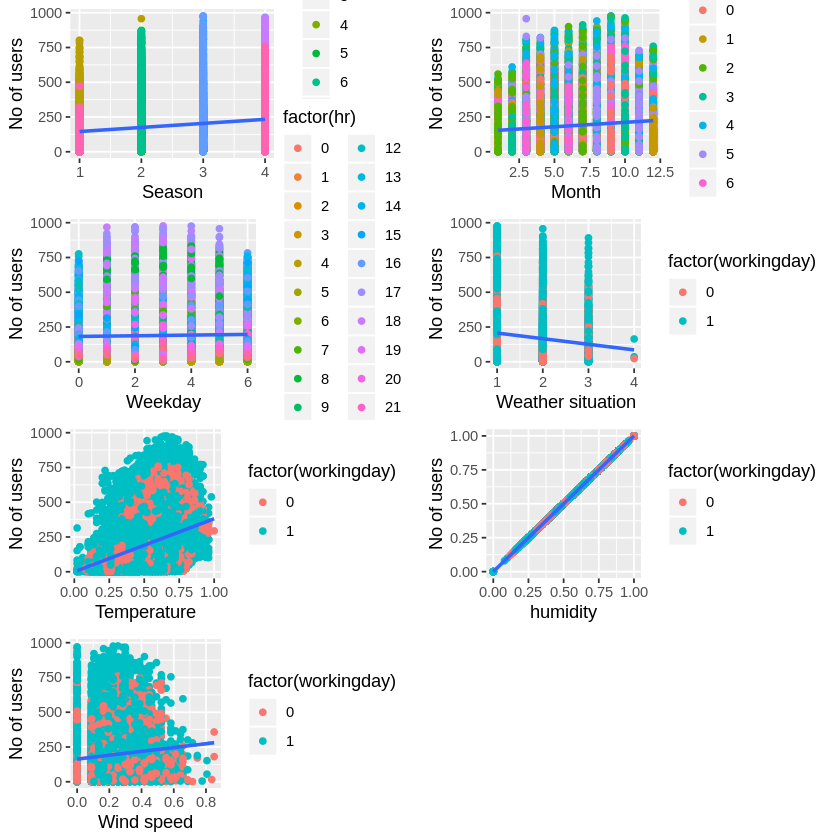

In [5]:
#package for plotting graphs
library(ggplot2)

#package for arranging multiple graphs in a grid layout
install.packages('gridExtra')
library(gridExtra)

grid.arrange(
    ggplot(bikeshare_data, aes(x=season,y=cnt)) + xlab("Season")+ ylab("No of users") + 
    geom_point(aes(colour = factor(mnth))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=mnth,y=cnt)) + xlab("Month")+ ylab("No of users") + 
    geom_point(aes(colour = factor(weekday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=weekday,y=cnt)) + xlab("Weekday")+ ylab("No of users") + 
    geom_point(aes(colour = factor(hr))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=weathersit,y=cnt)) + xlab("Weather situation")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=temp,y=cnt)) + xlab("Temperature")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=hum,y=hum)) + xlab("humidity")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=windspeed,y=cnt)) + xlab("Wind speed")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ncol=2)    

#mnth, weekday, hr, and workingday are discrete variables. To get ggplot to recognize them as such,
#we must convert them to factors.  Otherwise, gradient color is used (which is more appropriate for
#continuous variables).

#method() is a smoothing function.  The method=lm argument specifies that we want a linear line.

There are some positive linear relationships between `cnt` and `season`, `mnth`, `weather situation`, `temperature`, `humidity`, `windspeed`. 

**Activity 2: ** Plot individual scatter plots between variables 

    2.a cnt and mnth
    2.b cnt and temp
    2.c cnt and hum
    2.d cnt and windspeed
    2.e cnt and hr
    2.f cnt and weathersit

Use weekday for plotting points with different colors. Add a regression line. Calculate pearson correlation coefficients for all  pairs of variables.


	Pearson's product-moment correlation

data:  bikeshare_data$mnth and bikeshare_data$cnt
t = 16.02, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1059602 0.1352628
sample estimates:
      cor 
0.1206378 


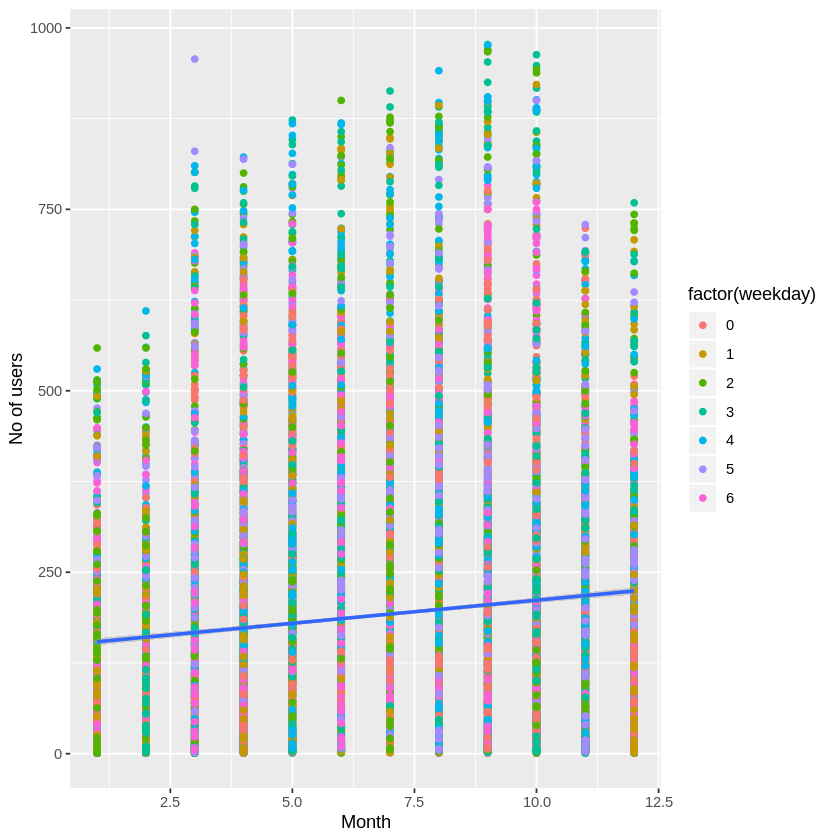

In [7]:
# Your code for activity 2.a goes here
ggplot(bikeshare_data, aes(x=mnth,y=cnt)) + xlab("Month")+ ylab("No of users") + 
    geom_point(aes(colour = factor(weekday))) + geom_smooth(method=lm)

cor.test(bikeshare_data$mnth,bikeshare_data$cnt)


	Pearson's product-moment correlation

data:  bikeshare_data$temp and bikeshare_data$cnt
t = 58.352, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3922653 0.4171296
sample estimates:
      cor 
0.4047723 


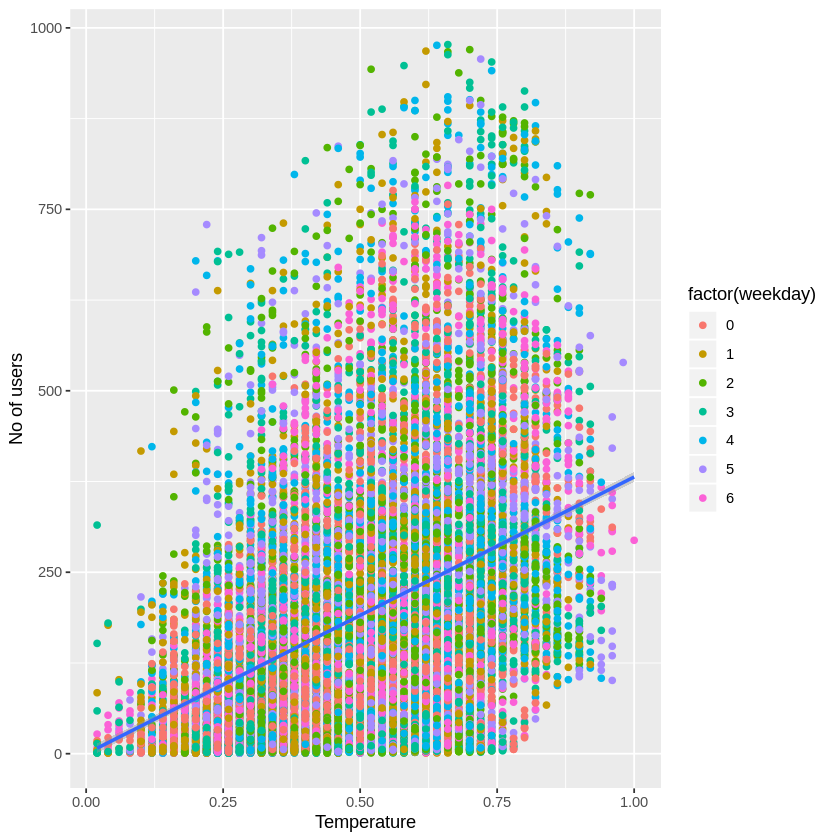

In [8]:
# Your code for activity 2.b goes here
ggplot(bikeshare_data, aes(x=temp,y=cnt)) + xlab("Temperature")+ ylab("No of users") + 
    geom_point(aes(colour=factor(weekday))) + geom_smooth(method=lm)

cor.test(bikeshare_data$temp,bikeshare_data$cnt)


	Pearson's product-moment correlation

data:  bikeshare_data$hum and bikeshare_data$cnt
t = -44.976, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3361645 -0.3095292
sample estimates:
       cor 
-0.3229107 


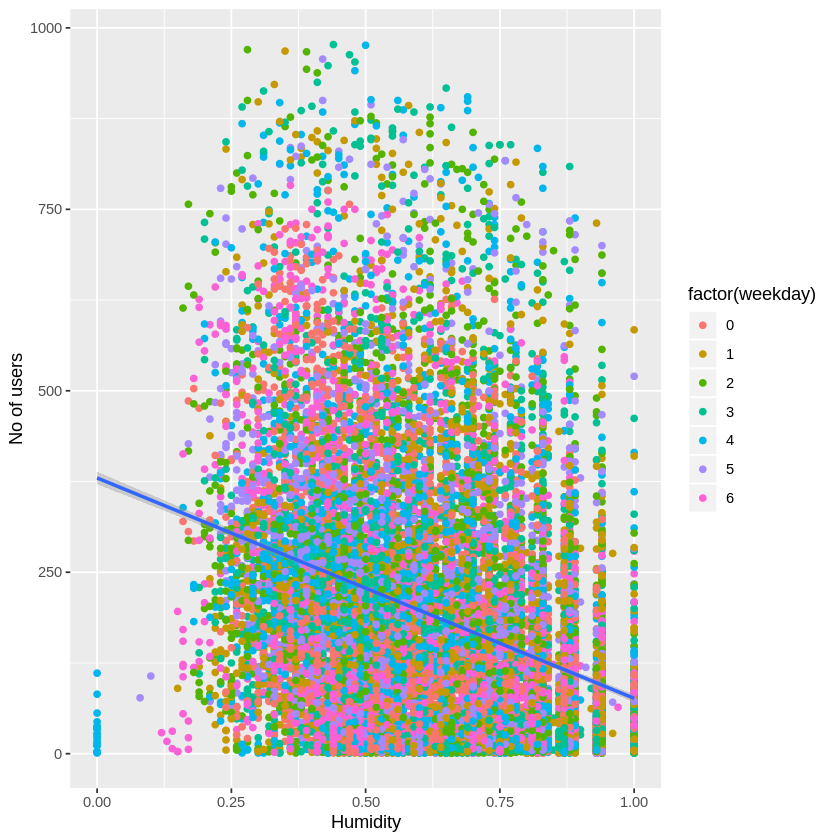

In [10]:
# Your code for activity 2.c goes here
ggplot(bikeshare_data, aes(x=hum, y=cnt)) + xlab("Humidity")+ ylab("No of users") + 
    geom_point(aes(colour=factor(weekday))) + geom_smooth(method=lm)

cor.test(bikeshare_data$hum,bikeshare_data$cnt)


	Pearson's product-moment correlation

data:  bikeshare_data$windspeed and bikeshare_data$cnt
t = 12.344, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07847495 0.10795176
sample estimates:
       cor 
0.09323378 


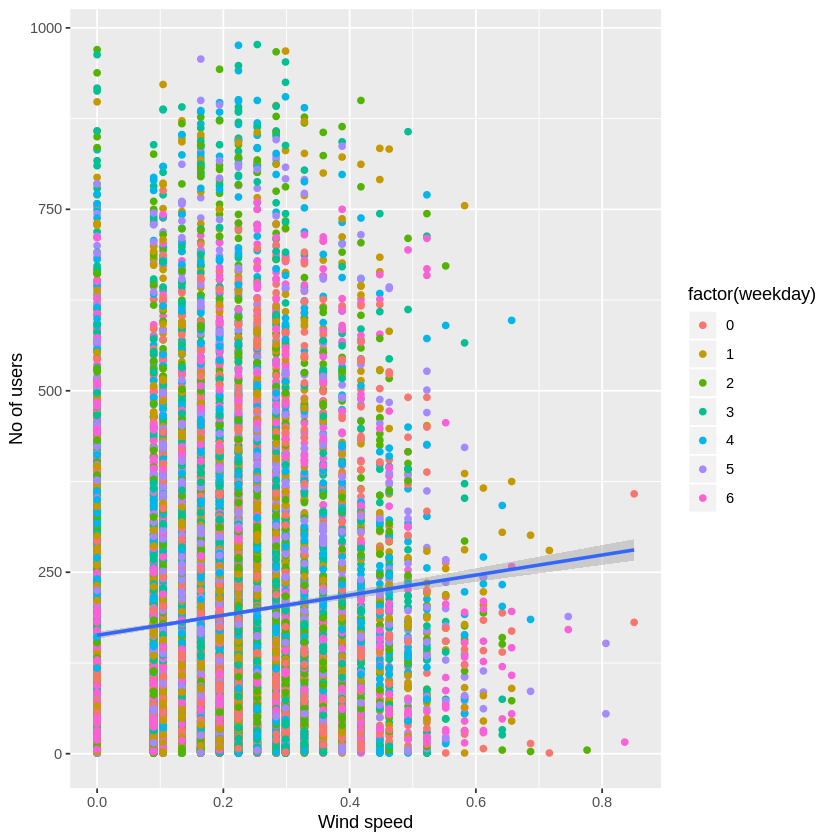

In [11]:
# Your code for activity 2.d goes here
ggplot(bikeshare_data, aes(x=windspeed,y=cnt)) + xlab("Wind speed")+ ylab("No of users") + 
    geom_point(aes(colour=factor(weekday))) + geom_smooth(method=lm)

cor.test(bikeshare_data$windspeed,bikeshare_data$cnt)


	Pearson's product-moment correlation

data:  bikeshare_data$hr and bikeshare_data$cnt
t = 56.521, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3814387 0.4065571
sample estimates:
      cor 
0.3940715 


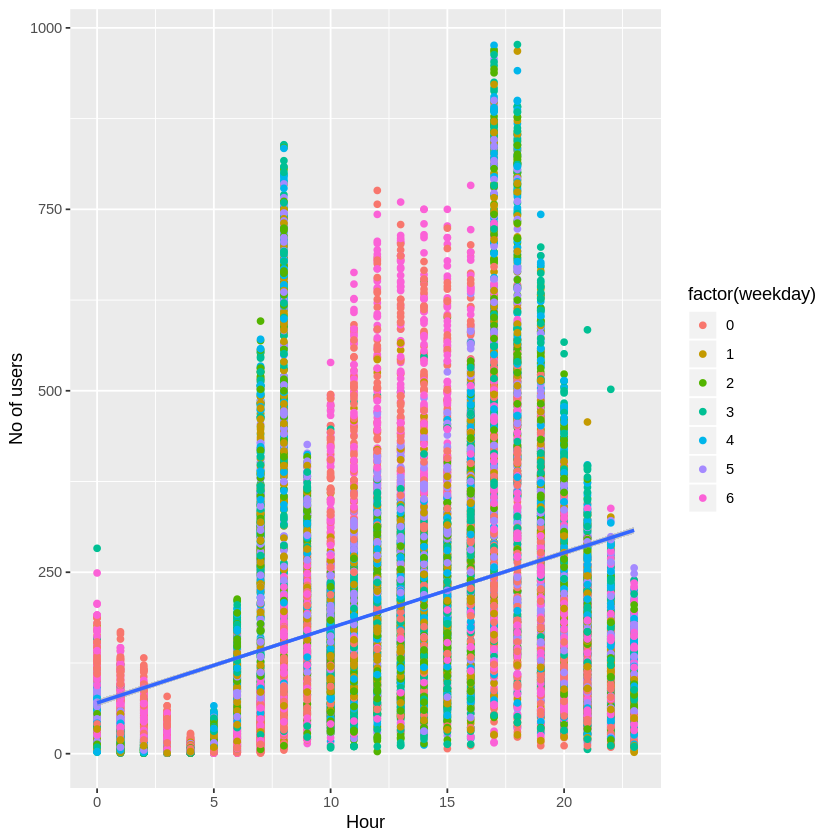

In [14]:
# Your code for activity 2.e goes here
ggplot(bikeshare_data, aes(x=hr,y=cnt)) + xlab("Hour")+ ylab("No of users")+ 
    geom_point(aes(colour = factor(weekday))) + geom_smooth(method=lm)

cor.test(bikeshare_data$hr,bikeshare_data$cnt)


	Pearson's product-moment correlation

data:  bikeshare_data$weathersit and bikeshare_data$cnt
t = -18.968, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1569614 -0.1278292
sample estimates:
       cor 
-0.1424261 


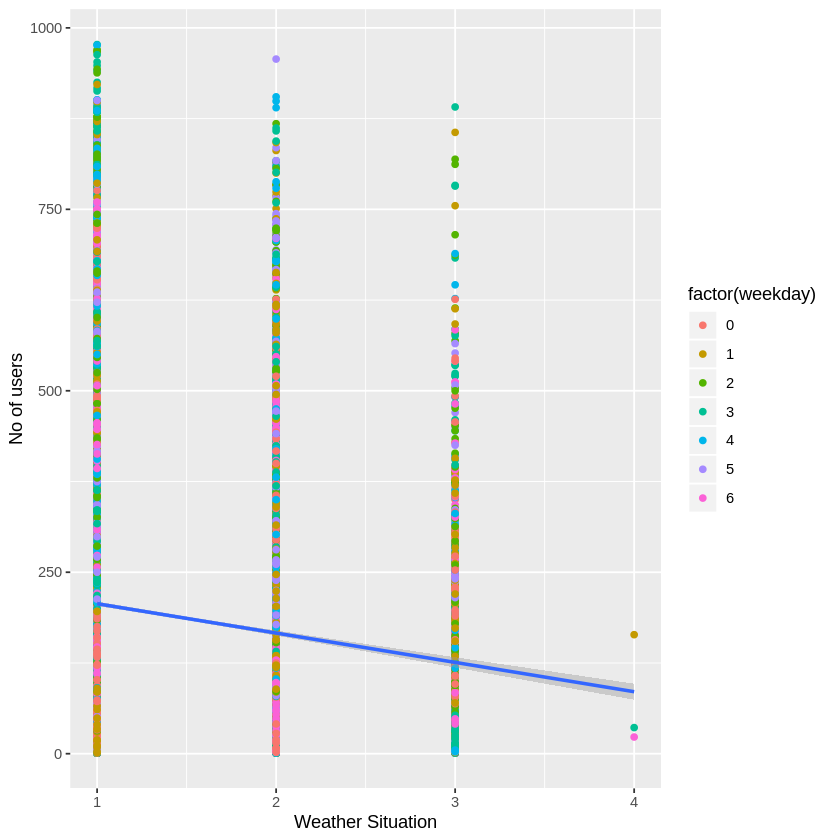

In [15]:
# Your code for activity 2.f goes here
ggplot(bikeshare_data, aes(x=weathersit,y=cnt)) + xlab("Weather Situation")+ ylab("No of users") + 
    geom_point(aes(colour=factor(weekday))) + geom_smooth(method=lm)

cor.test(bikeshare_data$weathersit,bikeshare_data$cnt)

** Activity 3: ** Build a linear regression model to predict count using `temperature` (temp) and `windspeed` as the predictor (independent) variables.

In [17]:
# Your code for activity 3 goes here
# fit variable will hold a statistical model

fit <- lm(cnt ~ temp + windspeed, data=bikeshare_data)

summary(fit) # show results of analysis


Call:
lm(formula = cnt ~ temp + windspeed, data = bikeshare_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-326.58 -110.79  -33.43   76.23  744.12 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -30.078      4.006  -7.508  6.3e-14 ***
temp         383.531      6.495  59.050  < 2e-16 ***
windspeed    152.193     10.223  14.888  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 164.8 on 17376 degrees of freedom
Multiple R-squared:  0.1744,	Adjusted R-squared:  0.1743 
F-statistic:  1835 on 2 and 17376 DF,  p-value: < 2.2e-16


** Activity 4: ** Plot your linear model with the function of temperature and windspeed as the x-axis and count as the y-axis.

In [18]:
fit


Call:
lm(formula = cnt ~ temp + windspeed, data = bikeshare_data)

Coefficients:
(Intercept)         temp    windspeed  
     -30.08       383.53       152.19  


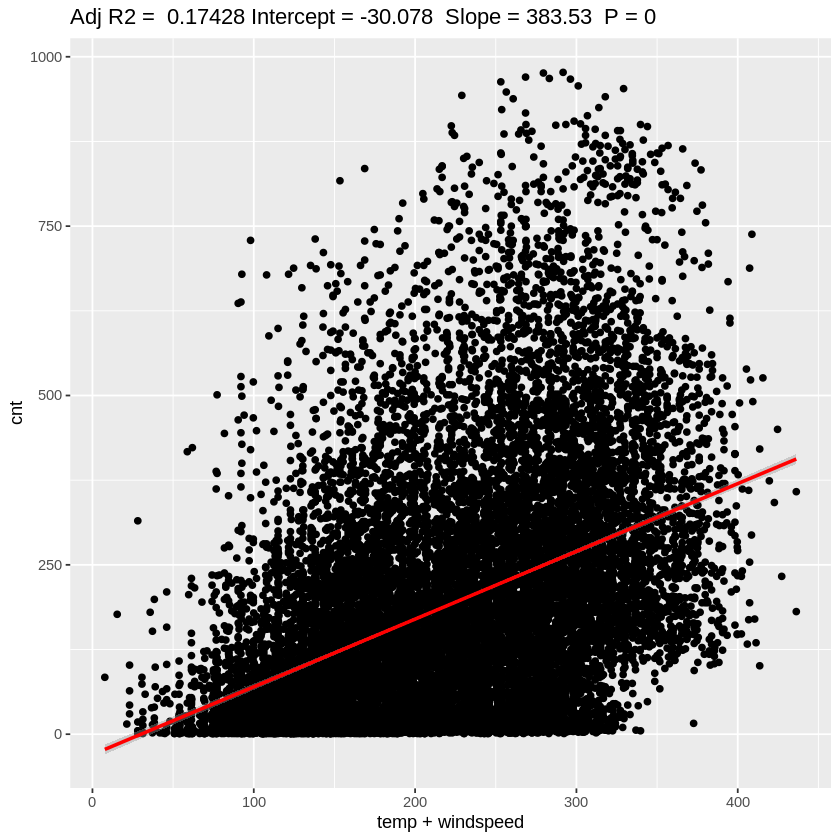

In [21]:
# Your code for activity 4 goes here

require(ggplot2)

    # Note that fit is an object with various things, such as a model.
ggplot(bikeshare_data, 
       aes_string(
                x = (383.53*bikeshare_data$temp + 152.19*bikeshare_data$windspeed), 
                y = names(fit$model)[1]
       ) # end of aes_string
  ) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)
                ) # end of title string concatenations
       , x = "temp + windspeed"
      ) 


# Save your notebook